In [1]:
import glob
import subprocess as sbp
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lua_popmap = pd.read_csv('Lua_Popmap.csv')
lua_popmap['id'] = lua_popmap['id'].astype(str)
lua_popmap

,id,indv,pop
0,3005842,Preit17,P.reitzii
1,3005924,Preit18,P.reitzii
2,3006949,Preit19,P.reitzii
3,3005899,Preit2,P.reitzii
4,3005912,Preit20,P.reitzii
...,...,...,...
116,2062240,Palti309_Q,west
117,2062241,Palti313_Q,west
118,2062242,Palti314_Q,west
119,2062343,Palti324_R,north


In [3]:
for i in range(10):
    lua_popmap['idv'] =lua_popmap['id'].apply(lambda x: x + '_sampl.'+str(i))
    lua_popmap[['idv','pop']].to_csv('Lua_Popmap.sampl.'+str(i)+'.txt', index=False, header=None, sep='\t')

In [4]:
fastqs_alti_cali_sche = pd.read_csv('../Calib_proj/RAW_DART_alti_cali_sche2020/fastq_files_list.txt', header=None)
fastqs_alti_cali_sche['id'] = fastqs_alti_cali_sche[0].str.replace('.FASTQ.gz','')
fastqs_alti_cali_sche['path'] = fastqs_alti_cali_sche[0].apply(lambda x: '../Calib_proj/RAW_DART_alti_cali_sche2020/' + x)

fastqs_dpetu = pd.read_csv('../Calib_proj/RAW_dart_DPetu22-7327/fastq_files_list.txt', header=None)
fastqs_dpetu['id'] = fastqs_dpetu[0].str.replace('.FASTQ.gz','')
fastqs_dpetu['path'] = fastqs_dpetu[0].apply(lambda x: '../Calib_proj/RAW_dart_DPetu22-7327/' + x)

fastqs_bonj_int_calib = pd.read_csv('../Calib_proj/RAW_DATA_DART-bonj-int-calib2023/fastq_files_list.txt', header=None)
fastqs_bonj_int_calib['id'] = fastqs_bonj_int_calib[0].str.replace('.FASTQ.gz','')
fastqs_bonj_int_calib['path'] = fastqs_bonj_int_calib[0].apply(lambda x: '../Calib_proj/RAW_DATA_DART-bonj-int-calib2023/' + x)

print(len(fastqs_alti_cali_sche[0]), len(fastqs_dpetu[0]), len(fastqs_bonj_int_calib[0]))


211 684 110


In [5]:
fastq_files = pd.concat([fastqs_alti_cali_sche, fastqs_dpetu, fastqs_bonj_int_calib])
lua_popmap_files = lua_popmap.merge(fastq_files, left_on='id', right_on='id', how='left')
lua_popmap_files

,id,indv,pop,idv,0,path
0,3005842,Preit17,P.reitzii,3005842_sampl.9,3005842.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005842.FA...
1,3005924,Preit18,P.reitzii,3005924_sampl.9,3005924.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005924.FA...
2,3006949,Preit19,P.reitzii,3006949_sampl.9,3006949.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3006949.FA...
3,3005899,Preit2,P.reitzii,3005899_sampl.9,3005899.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005899.FA...
4,3005912,Preit20,P.reitzii,3005912_sampl.9,3005912.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005912.FA...
...,...,...,...,...,...,...
116,2062240,Palti309_Q,west,2062240_sampl.9,2062240.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...
117,2062241,Palti313_Q,west,2062241_sampl.9,2062241.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...
118,2062242,Palti314_Q,west,2062242_sampl.9,2062242.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...
119,2062343,Palti324_R,north,2062343_sampl.9,2062343.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...


In [5]:
for file in lua_popmap_files['path']:
    sbp.run(['cp',file, 'Lua_Petu/orig_fastqs/'])

In [6]:
parc_sequencing_table1 = pd.read_csv('/home/lem/Documents/guzmanrs/Calib_proj/RAW_DATA_DART-bonj-int-calib2023/targets_HLJJLDMXY_1.csv')
parc_sequencing_table2 = pd.read_csv('/home/lem/Documents/guzmanrs/Calib_proj/RAW_DATA_DART-bonj-int-calib2023/targets_HLJJLDMXY_2.csv')
sequencing_table1 = pd.concat([parc_sequencing_table1, parc_sequencing_table2])

# DArT samples - Plate 2:
sequencing_table2 = pd.read_csv('/home/lem/Documents/guzmanrs/Calib_proj/RAW_DART_alti_cali_sche2020/targets_HK2HYDRXX_1.csv')

# DArT samples - Plate 3:
parc_sequencing_table3 = pd.read_csv('/home/lem/Documents/guzmanrs/Calib_proj/RAW_dart_DPetu22-7327/targets_HG7NHDMXY_1.csv')
parc_sequencing_table4 = pd.read_csv('/home/lem/Documents/guzmanrs/Calib_proj/RAW_dart_DPetu22-7327/targets_HG7NHDMXY_2.csv')
parc_sequencing_table5 = pd.read_csv('/home/lem/Documents/guzmanrs/Calib_proj/RAW_dart_DPetu22-7327/targets_HGJK3DMXY_1.csv')
parc_sequencing_table6 = pd.read_csv('/home/lem/Documents/guzmanrs/Calib_proj/RAW_dart_DPetu22-7327/targets_HGJK3DMXY_2.csv')
sequencing_table3 = pd.concat([parc_sequencing_table3,parc_sequencing_table4,parc_sequencing_table5,parc_sequencing_table6])

# Concatenate all plates info:
full_sequencing_info = pd.concat([sequencing_table1,sequencing_table2,sequencing_table3])
full_sequencing_info['targetid'] = full_sequencing_info['targetid'].astype(str)
full_sequencing_info.head()

,targetid,ordernumber,organism,species,genotype,tissue,aliastargetname,primersname,extractplatebarcode,extractplatewell,...,barcode9l,barcode,extractid,tagcounttotal,tagcountunique,overrepcount,overreppct,targetquality,flowcellbarcode,flowcelllane
0,3402114,DPetu23-8248,Petunia,-,Cthy_062,leaf,P_ad_m,MyTaq-EBPCR1+MseI,E/viduship/2-6-23/006,A1,...,GACAGCAGACAGTGC,GACAGCAGACAG,2451925,1028788,188210,35,5.27,good,HLJJLDMXY,1
1,3402115,DPetu23-8248,Petunia,-,Chete_504,leaf,P_ad_m,MyTaq-EBPCR1+MseI,E/viduship/2-6-23/006,B1,...,TAGCCATCTGTTGCA,TAGCCATCTGT,2451926,941578,224258,16,3.74,good,HLJJLDMXY,1
2,3402116,DPetu23-8248,Petunia,-,Cthy_061,leaf,P_ad_m,MyTaq-EBPCR1+MseI,E/viduship/2-6-23/006,C1,...,TGCGAGGTAGATGCA,TGCGAGGTAGA,2451927,1124891,210349,35,6.39,good,HLJJLDMXY,1
3,3402117,DPetu23-8248,Petunia,-,Chete_068,leaf,P_ad_m,MyTaq-EBPCR1+MseI,E/viduship/2-6-23/006,D1,...,TGCAAGTATGCAGAT,TGCAAGTATGCAGA,2451928,1072838,219614,18,3.40,good,HLJJLDMXY,1
4,3402118,DPetu23-8248,Petunia,-,Chete_036,leaf,P_ad_m,MyTaq-EBPCR1+MseI,E/viduship/2-6-23/006,E1,...,GTGACATATGCTGTG,GTGACATATGCTG,2451929,978657,224252,29,4.68,good,HLJJLDMXY,1


In [7]:
lua_popmap_files_info = lua_popmap_files.merge(full_sequencing_info, left_on='id', right_on='targetid', how='left')
# lua_popmap_files_info[['barcode9l', 'id']].to_csv('lua_petu_barcodes.txt', index=False, header=None, sep='\t')

In [8]:
luapetu_preproc_files = pd.read_csv('Lua_Petu/lua_petu_PreProcFastqs.txt', header=None)
luapetu_preproc_files['id'] = luapetu_preproc_files[0].str.replace('cutadapt_trimmed_sequences/','').str.replace('.fq.gz','')
lua_popmap_files_info = lua_popmap_files_info.merge(luapetu_preproc_files, left_on='id', right_on='id')
lua_popmap_files_info

,id,indv,pop,idv,0_x,path,targetid,ordernumber,organism,species,...,barcode,extractid,tagcounttotal,tagcountunique,overrepcount,overreppct,targetquality,flowcellbarcode,flowcelllane,0_y
0,3005842,Preit17,P.reitzii,3005842_sampl.9,3005842.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005842.FA...,3005842,DPetu22-7327,Petunia,-,...,AGGAGTGTGTCAG,2104649,595998,120320,37,7.83,good,HGJK3DMXY,1,cutadapt_trimmed_sequences/3005842.fq.gz
1,3005924,Preit18,P.reitzii,3005924_sampl.9,3005924.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005924.FA...,3005924,DPetu22-7327,Petunia,-,...,CGCTGCCAACAT,2104640,413468,66590,46,10.27,good,HGJK3DMXY,1,cutadapt_trimmed_sequences/3005924.fq.gz
2,3006949,Preit19,P.reitzii,3006949_sampl.9,3006949.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3006949.FA...,3006949,DPetu22-7327,Petunia,-,...,GAATACTTGT,2104633,296361,102739,36,7.76,good,HGJK3DMXY,1,cutadapt_trimmed_sequences/3006949.fq.gz
3,3005899,Preit2,P.reitzii,3005899_sampl.9,3005899.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005899.FA...,3005899,DPetu22-7327,Petunia,-,...,TATCTGGAGA,2104630,557438,139923,38,7.63,good,HGJK3DMXY,1,cutadapt_trimmed_sequences/3005899.fq.gz
4,3005912,Preit20,P.reitzii,3005912_sampl.9,3005912.FASTQ.gz,../Calib_proj/RAW_dart_DPetu22-7327/3005912.FA...,3005912,DPetu22-7327,Petunia,-,...,ACTGAGACACCTGA,2104639,534867,87609,41,9.74,good,HGJK3DMXY,1,cutadapt_trimmed_sequences/3005912.fq.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2062240,Palti309_Q,west,2062240_sampl.9,2062240.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...,2062240,DPetu20-4980,Petunia,-,...,ACGAGTGTAAG,1420053,1524651,231693,37,6.34,good,HK2HYDRXX,1,cutadapt_trimmed_sequences/2062240.fq.gz
117,2062241,Palti313_Q,west,2062241_sampl.9,2062241.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...,2062241,DPetu20-4980,Petunia,-,...,TTGCAGCCACCGAG,1420054,2176786,372782,31,6.35,good,HK2HYDRXX,1,cutadapt_trimmed_sequences/2062241.fq.gz
118,2062242,Palti314_Q,west,2062242_sampl.9,2062242.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...,2062242,DPetu20-4980,Petunia,-,...,TAGATGCGTG,1420055,1881172,246526,37,14.41,good,HK2HYDRXX,1,cutadapt_trimmed_sequences/2062242.fq.gz
119,2062343,Palti324_R,north,2062343_sampl.9,2062343.FASTQ.gz,../Calib_proj/RAW_DART_alti_cali_sche2020/2062...,2062343,DPetu20-4980,Petunia,-,...,GTAGACGACT,1419966,1506286,241678,40,12.00,good,HK2HYDRXX,1,cutadapt_trimmed_sequences/2062343.fq.gz


In [9]:
for k, K in [(50000,'50K'), (100000, '100K'), (200000, '200K'), (500000, '500K')]:
    print(k, K)

50000 50K
100000 100K
200000 200K
500000 500K


In [10]:
lua_popmap_files_info['id'].dtype

dtype('O')

In [17]:
for k, K in [(50000,'50K'), (100000, '100K'), (200000, '200K'), (500000, '500K')]:
    for f in lua_popmap_files_info.index:
        sbp.run(['python3', 'SamplingReads.py','--input=Lua_Petu/'+lua_popmap_files_info['0_y'][f], '--output=Lua_Petu/'+ K + '/'+lua_popmap_files_info['id'][f]+'_sampl', '-n', str(k), '-s','10'])

counting records....
sampling 50000 out of 97175 records


done!
counting records....
sampling 50000 out of 125602 records
79.61656661518128 % done
done!
counting records....
sampling 50000 out of 78478 records
done!
counting records....
sampling 50000 out of 155467 records
64.32233207047155 % done
done!
counting records....
sampling 50000 out of 230300 records
43.42162396873643 % done
86.84324793747285 % done
done!
counting records....
sampling 50000 out of 158040 records
63.27512022272842 % done
done!
counting records....
sampling 50000 out of 102202 records
97.84544333770377 % done
done!
counting records....
sampling 50000 out of 150565 records
66.41649785806794 % done
done!
counting records....
sampling 50000 out of 164127 records
60.92842737636099 % done
done!
counting records....
sampling 50000 out of 158570 records
63.06363120388472 % done
done!
counting records....
sampling 50000 out of 150046 records
66.64622848992975 % done
done!
counting records....
sampling 50000 out of 113783 records
87.88659114278936 % done
done!
counting records

In [6]:
K_dirs = ['50K','100K','200K','500K']
sampl_dirs = ['sampl_'+str(n) for n in range(10)]

In [7]:
stacks_results = {K : {sampl : pd.read_csv('Lua_Petu/' + K + '/' + sampl + '/07_freebayes/Paxil_Sampl_OnlySNPs_STACKS/Paxil_Sampl_OnlySNPs.p.sumstats_summary.tsv', sep='\t', skiprows=10, index_col=0) for sampl in sampl_dirs} for K in K_dirs}
stacks_results

FileNotFoundError: [Errno 2] No such file or directory: 'Lua_Petu/50K/sampl_0/07_freebayes/Paxil_Sampl_OnlySNPs_STACKS/Paxil_Sampl_OnlySNPs.p.sumstats_summary.tsv'

In [13]:
interest_cols = ['Private','Obs_Het','Fis','Pi']

In [14]:
pd.DataFrame(stacks_results['50K']['sampl_0']['Private']).transpose()

# Pop ID,P.reitzii,P.saxicola,P.scheideana,P.interior,north,west,south
Private,81,78,192,195,32,22,58


In [15]:
pd.concat([pd.DataFrame(stacks_results['50K'][sampl]['Private']).transpose() for sampl in sampl_dirs]).reset_index().drop(columns='index').mean()

# Pop ID
P.reitzii        91.4
P.saxicola       79.2
P.scheideana    181.0
P.interior      188.1
north            39.1
west             23.9
south            62.8
dtype: float64

In [16]:
pd.concat([pd.DataFrame(stacks_results['50K'][sampl]['Private']).transpose() for sampl in sampl_dirs])

# Pop ID,P.reitzii,P.saxicola,P.scheideana,P.interior,north,west,south
Private,81,78,192,195,32,22,58
Private,94,84,179,171,38,25,68
Private,103,71,172,198,43,23,61
Private,90,83,191,192,41,27,61
Private,81,77,179,171,32,24,61
Private,105,93,193,203,32,23,62
Private,91,64,166,191,53,28,59
Private,82,86,168,200,31,25,66
Private,109,78,184,182,53,21,69
Private,78,78,186,178,36,21,63


In [17]:
pd.DataFrame(sms.DescrStatsW(pd.concat([pd.DataFrame(stacks_results['50K'][sampl]['Private']).transpose() for sampl in sampl_dirs])).tconfint_mean())

,0,1,2,3,4,5,6
0,83.411314,73.449393,173.918328,179.646202,33.101135,22.19878,60.148994
1,99.388686,84.950607,188.081672,196.553798,45.098865,25.60122,65.451006


In [18]:
conf_interv_orig_res = {K : 
    {col : 
        pd.DataFrame(
            sms.DescrStatsW(pd.concat([
                            pd.DataFrame(stacks_results[K][sampl][col]).transpose() for sampl in sampl_dirs
                            ])).tconfint_mean()).reset_index().drop(columns='index').transpose() 
    for col in interest_cols } 
for K in K_dirs }

conf_interv = {K : 
    {col : 
        pd.DataFrame(
            sms.DescrStatsW(pd.concat([
                            pd.DataFrame(stacks_results[K][sampl][col]).transpose() for sampl in sampl_dirs
                            ])).tconfint_mean()).reset_index().drop(columns='index').transpose() 
    for col in interest_cols } 
for K in K_dirs }

conf_interv['50K']['Pi']

,0,1
0,0.067404,0.070076
1,0.060616,0.062940
2,0.075711,0.077219
3,0.084886,0.088412
4,0.075492,0.078554
5,0.065319,0.071123
6,0.074910,0.077628


In [19]:
for K in K_dirs:
    for col in interest_cols:
        conf_interv[K][col]['CI'] = conf_interv[K][col].apply(lambda x: ' , '.join(x.dropna().round(4).astype(str).values), axis=1)
        conf_interv[K][col]['mean'] = (conf_interv[K][col][0]+conf_interv[K][col][1])/2
        conf_interv[K][col] = conf_interv[K][col].drop(columns=[0,1])
conf_interv

{'50K': {'Private':                     CI   mean
  0    83.4113 , 99.3887   91.4
  1    73.4494 , 84.9506   79.2
  2  173.9183 , 188.0817  181.0
  3  179.6462 , 196.5538  188.1
  4    33.1011 , 45.0989   39.1
  5    22.1988 , 25.6012   23.9
  6      60.149 , 65.451   62.8,
  'Obs_Het':                 CI      mean
  0   0.027 , 0.0293  0.028155
  1  0.0273 , 0.0301  0.028693
  2   0.0231 , 0.024  0.023533
  3  0.0205 , 0.0225  0.021504
  4    0.017 , 0.019  0.018015
  5  0.0184 , 0.0207  0.019559
  6  0.0176 , 0.0191  0.018365,
  'Fis':                 CI      mean
  0  0.0966 , 0.1038  0.100178
  1  0.0652 , 0.0715  0.068371
  2   0.1203 , 0.124  0.122159
  3  0.1399 , 0.1472  0.143527
  4  0.1673 , 0.1772  0.172230
  5  0.0996 , 0.1125  0.106023
  6   0.1724 , 0.179  0.175686,
  'Pi':                 CI      mean
  0  0.0674 , 0.0701  0.068740
  1  0.0606 , 0.0629  0.061778
  2  0.0757 , 0.0772  0.076465
  3  0.0849 , 0.0884  0.086649
  4  0.0755 , 0.0786  0.077023
  5  0.0653 , 0.0

In [20]:
conf_intv_cols = {K: pd.concat([conf_interv[K][col]['CI'] for col in interest_cols], axis=1) for K in K_dirs}
for K in K_dirs:
    conf_intv_cols[K].columns = interest_cols
    conf_intv_cols[K]['K'] = K
    conf_intv_cols[K].index = stacks_results['50K']['sampl_0'].index

conf_intv_cols

mean_ci_cols = {K: pd.concat([conf_interv[K][col]['mean'] for col in interest_cols], axis=1) for K in K_dirs}
for K in K_dirs:
    mean_ci_cols[K].columns = interest_cols
    mean_ci_cols[K]['K'] = K
    mean_ci_cols[K].index = stacks_results['50K']['sampl_0'].index

mean_ci_cols

{'50K':               Private   Obs_Het       Fis        Pi    K
 # Pop ID                                                
 P.reitzii        91.4  0.028155  0.100178  0.068740  50K
 P.saxicola       79.2  0.028693  0.068371  0.061778  50K
 P.scheideana    181.0  0.023533  0.122159  0.076465  50K
 P.interior      188.1  0.021504  0.143527  0.086649  50K
 north            39.1  0.018015  0.172230  0.077023  50K
 west             23.9  0.019559  0.106023  0.068221  50K
 south            62.8  0.018365  0.175686  0.076269  50K,
 '100K':               Private   Obs_Het       Fis        Pi     K
 # Pop ID                                                 
 P.reitzii       623.1  0.031680  0.112796  0.078058  100K
 P.saxicola      480.8  0.033282  0.071252  0.068233  100K
 P.scheideana   1232.0  0.027162  0.140308  0.088390  100K
 P.interior     1413.8  0.024336  0.161792  0.098010  100K
 north           303.3  0.028273  0.182325  0.089370  100K
 west            153.4  0.028051  0.114192  0.077

In [21]:
pd.concat([conf_intv_cols[K] for K in K_dirs]).set_index([pd.concat([conf_intv_cols[K] for K in K_dirs]).index, pd.concat([conf_intv_cols[K] for K in K_dirs])['K']]).drop(columns='K')

,,Private,Obs_Het,Fis,Pi
# Pop ID,K,,,,
P.reitzii,50K,"83.4113 , 99.3887","0.027 , 0.0293","0.0966 , 0.1038","0.0674 , 0.0701"
P.saxicola,50K,"73.4494 , 84.9506","0.0273 , 0.0301","0.0652 , 0.0715","0.0606 , 0.0629"
P.scheideana,50K,"173.9183 , 188.0817","0.0231 , 0.024","0.1203 , 0.124","0.0757 , 0.0772"
P.interior,50K,"179.6462 , 196.5538","0.0205 , 0.0225","0.1399 , 0.1472","0.0849 , 0.0884"
north,50K,"33.1011 , 45.0989","0.017 , 0.019","0.1673 , 0.1772","0.0755 , 0.0786"
west,50K,"22.1988 , 25.6012","0.0184 , 0.0207","0.0996 , 0.1125","0.0653 , 0.0711"
south,50K,"60.149 , 65.451","0.0176 , 0.0191","0.1724 , 0.179","0.0749 , 0.0776"
P.reitzii,100K,"606.5196 , 639.6804","0.0314 , 0.032","0.1121 , 0.1135","0.0778 , 0.0783"
P.saxicola,100K,"472.1708 , 489.4292","0.0328 , 0.0337","0.0704 , 0.0721","0.0677 , 0.0688"


In [5]:
result_mean = pd.concat([mean_ci_cols[K] for K in K_dirs]).set_index([pd.concat([mean_ci_cols[K] for K in K_dirs]).index, pd.concat([mean_ci_cols[K] for K in K_dirs])['K']]).drop(columns='K')
result_mean

NameError: name 'K_dirs' is not defined

In [23]:
result_mean.reset_index().pivot(index='K', columns='# Pop ID', values='Private')

# Pop ID,P.interior,P.reitzii,P.saxicola,P.scheideana,north,south,west
K,,,,,,,
100K,1413.8,623.1,480.8,1232.0,303.3,476.4,153.4
200K,2314.6,1314.3,710.3,2227.4,1045.9,1800.0,569.3
500K,2491.7,1442.6,747.3,2329.0,4270.4,7413.3,2827.1
50K,188.1,91.4,79.2,181.0,39.1,62.8,23.9


In [4]:
result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['P.interior']

NameError: name 'result_mean' is not defined

In [25]:
barWidth = 0.1

br1 = np.arange(len(result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['P.interior'])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]

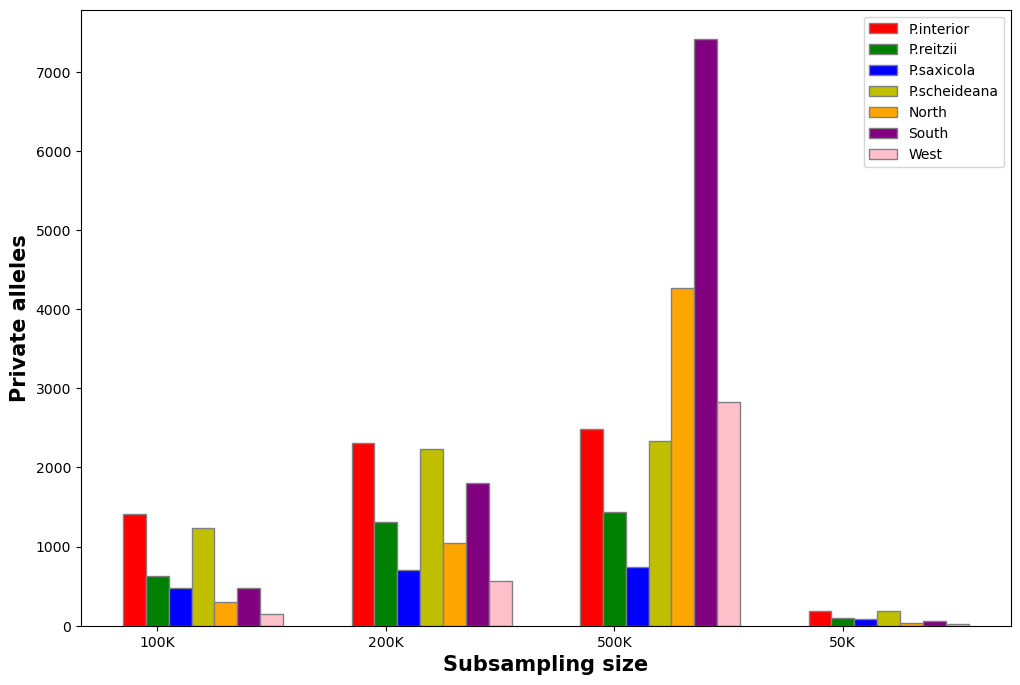

In [26]:
fig = plt.subplots(figsize =(12, 8))

plt.bar(br1, result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['P.interior'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='P.interior') 
plt.bar(br2, result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['P.reitzii'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='P.reitzii') 
plt.bar(br3, result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['P.saxicola'], color ='b', width = barWidth, 
        edgecolor ='grey', label ='P.saxicola') 
plt.bar(br4, result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['P.scheideana'], color ='y', width = barWidth, 
        edgecolor ='grey', label ='P.scheideana') 
plt.bar(br5, result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['north'], color ='Orange', width = barWidth, 
        edgecolor ='grey', label ='North') 
plt.bar(br6, result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['south'], color ='Purple', width = barWidth, 
        edgecolor ='grey', label ='South') 
plt.bar(br7, result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['west'], color ='Pink', width = barWidth, 
        edgecolor ='grey', label ='West') 

plt.xlabel('Subsampling size', fontweight ='bold', fontsize = 15) 
plt.ylabel('Private alleles', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').loc['P.interior']))], 
        ['100K', '200K', '500K', '50K'])
plt.legend()

In [36]:
result_mean.columns
fixed_col_names = ['Private Alleles','$H_o$','$F_{IS}$','π']

In [3]:
# species = ("Adelie", "Chinstrap", "Gentoo")
# penguin_means = {
#     'Bill Depth': (18.35, 18.43, 14.98),
#     'Bill Length': (38.79, 48.83, 47.50),
#     'Flipper Length': (189.95, 195.82, 217.19),
# }

# x = np.arange(len(species))  # the label locations
x = np.arange(len(result_mean.reset_index().pivot(index='K', columns='# Pop ID', values='Private').index))  # the label locations
width = 0.1  # the width of the bars


fig, ax = plt.subplots(2,2, figsize=(20,10))

for n, col in enumerate(result_mean.columns):
    multiplier = 0
    for attribute, measurement in result_mean.reset_index().pivot(index='K', columns='# Pop ID', values=col).reset_index().drop(columns='K').to_dict('list').items():
        offset = width * multiplier
        rects = ax[n//2, n%2].bar(x + offset, measurement, width, label=attribute)
        # ax[n//2, n%2].bar_label(rects, padding=3)
        multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[n//2, n%2].set_ylabel(fixed_col_names[n])
        # ax[n//2, n%2].set_title(col.capitalize())
        ax[n//2, n%2].set_xticks(x + width, result_mean.reset_index().pivot(index='K', columns='# Pop ID', values='Private').index)
        if n//2 == 0 and n%2 == 0:
            ax[n//2, n%2].legend(loc='upper left', ncols=2)
# ax.set_ylim(0, 250)

plt.show()

NameError: name 'result_mean' is not defined

In [69]:
for n, col in enumerate(result_mean.columns):
    print(n, n//2, n%2)

0 0 0
1 0 1
2 1 0
3 1 1
4 2 0
5 2 1
6 3 0
7 3 1
8 4 0


In [62]:
for attribute, measurement in result_mean.reset_index().pivot(index='K', columns='# Pop ID', values='Private').reset_index().drop(columns='K').to_dict('list').items():
    print(attribute)
    print(measurement)

P.interior
[1413.8, 2314.6, 2491.7, 188.1]
P.reitzii
[623.1, 1314.3, 1442.6, 91.4]
P.saxicola
[480.8, 710.3, 747.3, 79.2]
P.scheideana
[1232.0, 2227.4, 2329.0, 181.0]
north
[303.3, 1045.9, 4270.4, 39.1]
south
[476.4, 1800.0, 7413.3, 62.8]
west
[153.4, 569.3, 2827.1, 23.9]


In [53]:
result_mean.reset_index().pivot(index='K', columns='# Pop ID', values='Private').reset_index().drop(columns='K').to_dict()

{'P.interior': {0: 1413.8, 1: 2314.6, 2: 2491.7, 3: 188.1},
 'P.reitzii': {0: 623.1, 1: 1314.3, 2: 1442.6, 3: 91.4},
 'P.saxicola': {0: 480.8, 1: 710.3, 2: 747.3, 3: 79.2},
 'P.scheideana': {0: 1232.0, 1: 2227.4, 2: 2329.0, 3: 181.0},
 'north': {0: 303.3, 1: 1045.9, 2: 4270.4, 3: 39.1},
 'south': {0: 476.4, 1: 1800.0, 2: 7413.3, 3: 62.8},
 'west': {0: 153.4, 1: 569.3, 2: 2827.1, 3: 23.9}}

In [49]:
pd.DataFrame(penguin_means, index=species)

,Bill Depth,Bill Length,Flipper Length
Adelie,18.35,38.79,189.95
Chinstrap,18.43,48.83,195.82
Gentoo,14.98,47.50,217.19


<BarContainer object of 7 artists>

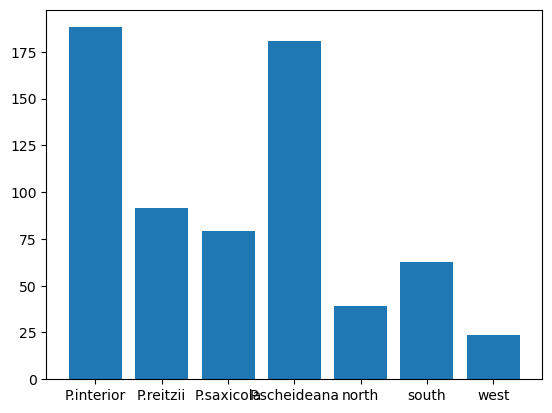

In [35]:
plt.bar(result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private').index.get_level_values('# Pop ID'),
        result_mean.reset_index().pivot(columns='K', index='# Pop ID', values='Private')['50K'])

In [ ]:
plt.bar(result_mean.index.get_level_values('# Pop ID'), result_mean['Pi'])

<h1> MY Axillaris samples </h1>

In [2]:
axil_popmap = pd.read_csv('/home/lem/Documents/guzmanrs/Paxil_proj/Paxil_Popmap.csv')
axil_popmap

,Indv,Pop
0,P.axil1002,Axil02
1,P.axil1003,Axil02
2,P.axil1004,Axil02
3,P.axil1012,Axil02
4,P.axil1052,Axil04
...,...,...
58,axil_09_63,Axil63
59,axil_10_63,Axil63
60,axil_11_63,Axil63
61,axil_12_63,Axil63


In [3]:
axil_fastqs = pd.read_csv('../01-GBSX_Pet_Gen5/axil_fastqs_lines', header=None, names=['file','num_lines'])
axil_fastqs['num_reads'] = axil_fastqs['num_lines']/4
axil_fastqs['name_indv'] = axil_fastqs['file'].str.replace('.R1.fastq.gz','').str.replace('.R1_final.fastq.gz','')
axil_fastqs.sort_values(by='num_reads', ascending=False)

,file,num_lines,num_reads,name_indv
19,P.axil189.R1.fastq.gz,14328612,3582153.0,P.axil189
40,P.axil828.R1.fastq.gz,12413060,3103265.0,P.axil828
49,P.axil918.R1.fastq.gz,12186212,3046553.0,P.axil918
1,P.axil1002.R1.fastq.gz,11725212,2931303.0,P.axil1002
15,P.axil185.R1_final.fastq.gz,11641540,2910385.0,P.axil185
21,P.axil334.R1.fastq.gz,10893284,2723321.0,P.axil334
44,P.axil832.R1.fastq.gz,10753744,2688436.0,P.axil832
48,P.axil917.R1.fastq.gz,10589020,2647255.0,P.axil917
39,P.axil495.R1.fastq.gz,9784604,2446151.0,P.axil495
54,P.axil994.R1.fastq.gz,8659132,2164783.0,P.axil994


In [4]:
axil_reads = pd.merge(axil_fastqs, axil_popmap, left_on='name_indv',right_on='Indv', how='left').dropna().reset_index().drop(columns=['name_indv','index'])
axil_reads['file_full'] = ['../01-GBSX_Pet_Gen5/'+file for file in axil_reads['file']]
axil_reads

,file,num_lines,num_reads,Indv,Pop,file_full
0,P.axil1002.R1.fastq.gz,11725212,2931303.0,P.axil1002,Axil02,../01-GBSX_Pet_Gen5/P.axil1002.R1.fastq.gz
1,P.axil1003.R1.fastq.gz,594068,148517.0,P.axil1003,Axil02,../01-GBSX_Pet_Gen5/P.axil1003.R1.fastq.gz
2,P.axil1004.R1.fastq.gz,2462608,615652.0,P.axil1004,Axil02,../01-GBSX_Pet_Gen5/P.axil1004.R1.fastq.gz
3,P.axil1012.R1.fastq.gz,1853664,463416.0,P.axil1012,Axil02,../01-GBSX_Pet_Gen5/P.axil1012.R1.fastq.gz
4,P.axil1052.R1.fastq.gz,4365444,1091361.0,P.axil1052,Axil04,../01-GBSX_Pet_Gen5/P.axil1052.R1.fastq.gz
5,P.axil1053.R1.fastq.gz,5953552,1488388.0,P.axil1053,Axil04,../01-GBSX_Pet_Gen5/P.axil1053.R1.fastq.gz
6,P.axil1054.R1.fastq.gz,7076400,1769100.0,P.axil1054,Axil04,../01-GBSX_Pet_Gen5/P.axil1054.R1.fastq.gz
7,P.axil1056.R1.fastq.gz,4513900,1128475.0,P.axil1056,Axil04,../01-GBSX_Pet_Gen5/P.axil1056.R1.fastq.gz
8,P.axil1059.R1.fastq.gz,929940,232485.0,P.axil1059,Axil04,../01-GBSX_Pet_Gen5/P.axil1059.R1.fastq.gz
9,P.axil1062.R1_final.fastq.gz,3634012,908503.0,P.axil1062,Axil03,../01-GBSX_Pet_Gen5/P.axil1062.R1_final.fastq.gz


In [12]:
axil_reads.to_csv('my_axil_reads.csv', index=False)

In [5]:
axil_reads['num_reads'].std()

871255.4863384868

<Axes: ylabel='Density'>

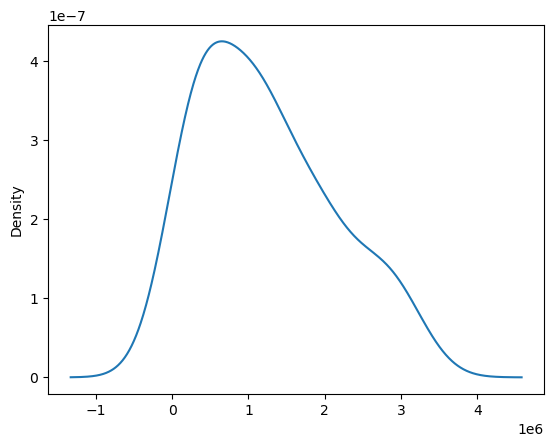

In [6]:
axil_reads['num_reads'].plot.kde()

<Axes: >

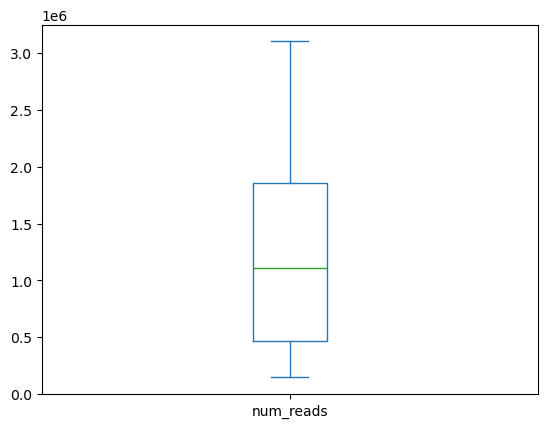

In [7]:
axil_reads['num_reads'].plot.box()

In [ ]:
for f in axil_reads.index:
    sbp.run(['python3', 'SamplingReads.py','--input='+axil_reads['file_full'][f], '--output=500K/'+axil_reads['file'][f]+'_sampl', '-n','500000','-s','10'])

In [9]:
K_dirs = ['50K','100K','200K','500K']
sampl_dirs = ['sampl_'+str(n) for n in range(10)]
print(sampl_dirs)

['sampl_0', 'sampl_1', 'sampl_2', 'sampl_3', 'sampl_4', 'sampl_5', 'sampl_6', 'sampl_7', 'sampl_8', 'sampl_9']


In [10]:
stacks_results = {K : {sampl : pd.read_csv(K+'/'+sampl+'/07_freebayes/Paxil_Sampl_OnlySNPs_STACKS/Paxil_Sampl_OnlySNPs.p.sumstats_summary.tsv', sep='\t', skiprows=13, index_col=0) for sampl in sampl_dirs} for K in K_dirs}
stacks_results   
        

{'50K': {'sampl_0':           Private  Sites  Variant_Sites  Polymorphic_Sites  %Polymorphic_Loci  \
  # Pop ID                                                                        
  Axil02          1     35              8                  0            0.00000   
  Axil04          1     42             12                  0            0.00000   
  Axil03          2     44             10                  0            0.00000   
  Axil11          0     51             16                  2            3.92157   
  Axil09          1     55             16                  8           14.54545   
  Axil08          0     56             17                  4            7.14286   
  Axil10          0     56             17                  6           10.71429   
  Axil06          1     44             17                  2            4.54545   
  Axil05          1     59             17                  3            5.08475   
  Axil07          1     52             17                  2         

In [11]:
stacks_results['50K']['sampl_0'].columns

Index(['Private', 'Sites', 'Variant_Sites', 'Polymorphic_Sites',
       '%Polymorphic_Loci', 'Num_Indv', 'Var', 'StdErr', 'P', 'Var.1',
       'StdErr.1', 'Obs_Het', 'Var.2', 'StdErr.2', 'Obs_Hom', 'Var.3',
       'StdErr.3', 'Exp_Het', 'Var.4', 'StdErr.4', 'Exp_Hom', 'Var.5',
       'StdErr.5', 'Pi', 'Var.6', 'StdErr.6', 'Fis', 'Var.7', 'StdErr.7'],
      dtype='object')

In [12]:
interest_cols = ['Private','Sites','Variant_Sites','Polymorphic_Sites','%Polymorphic_Loci','Obs_Het','Exp_Het','Fis','Pi']

In [13]:
stacks_res_filt_transp = {K: {samp: stacks_results[K][samp][interest_cols].transpose() for samp in sampl_dirs} for K in K_dirs}
stacks_res_filt_transp['50K']['sampl_0']

# Pop ID,Axil02,Axil04,Axil03,Axil11,Axil09,Axil08,Axil10,Axil06,Axil05,Axil07
Private,1.0,1.0,2.0,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000
Sites,35.0,42.0,44.0,51.00000,55.00000,56.00000,56.00000,44.00000,59.00000,52.00000
Variant_Sites,8.0,12.0,10.0,16.00000,16.00000,17.00000,17.00000,17.00000,17.00000,17.00000
Polymorphic_Sites,0.0,0.0,0.0,2.00000,8.00000,4.00000,6.00000,2.00000,3.00000,2.00000
%Polymorphic_Loci,0.0,0.0,0.0,3.92157,14.54545,7.14286,10.71429,4.54545,5.08475,3.84615
Obs_Het,0.0,0.0,0.0,0.00980,0.03000,0.00893,0.01786,0.00000,0.00989,0.00000
Exp_Het,0.0,0.0,0.0,0.00858,0.02689,0.02482,0.02500,0.02273,0.01477,0.01816
Fis,0.0,0.0,0.0,0.00000,-0.00000,0.05357,0.01786,0.04545,0.01695,0.03846
Pi,0.0,0.0,0.0,0.00980,0.03000,0.02928,0.02976,0.03030,0.01715,0.02308


In [14]:
pd.DataFrame(stacks_results['50K']['sampl_0']['Private']).transpose()

# Pop ID,Axil02,Axil04,Axil03,Axil11,Axil09,Axil08,Axil10,Axil06,Axil05,Axil07
Private,1,1,2,0,1,0,0,1,1,1


In [15]:
pd.concat([pd.DataFrame(stacks_results['50K'][sampl]['Private']).transpose() for sampl in sampl_dirs]).reset_index().drop(columns='index').mean()

# Pop ID
Axil02    1.1
Axil04    2.4
Axil03    2.0
Axil11    0.1
Axil09    0.8
Axil08    0.1
Axil10    0.1
Axil06    1.0
Axil05    0.4
Axil07    1.3
dtype: float64

In [16]:
len(st.sem(pd.concat([pd.DataFrame(stacks_results['50K'][sampl]['Private']).transpose() for sampl in sampl_dirs]).reset_index().drop(columns='index')))

10

In [17]:
pd.concat([pd.DataFrame(stacks_results['50K'][sampl]['Private']).transpose() for sampl in sampl_dirs])

# Pop ID,Axil02,Axil04,Axil03,Axil11,Axil09,Axil08,Axil10,Axil06,Axil05,Axil07
Private,1,1,2,0,1,0,0,1,1,1
Private,1,2,2,0,2,0,0,1,0,0
Private,2,1,2,0,1,1,0,1,0,3
Private,1,1,2,0,0,0,1,1,0,1
Private,1,3,2,1,1,0,0,1,0,1
Private,1,2,2,0,0,0,0,1,0,2
Private,1,1,2,0,1,0,0,1,2,0
Private,1,2,2,0,2,0,0,1,1,1
Private,1,3,2,0,0,0,0,1,0,2
Private,1,8,2,0,0,0,0,1,0,2


In [19]:
pd.DataFrame(sms.DescrStatsW(pd.concat([pd.DataFrame(stacks_results['50K'][sampl]['Private']).transpose() for sampl in sampl_dirs])).tconfint_mean())

,0,1,2,3,4,5,6,7,8,9
0,0.873784,0.884373,2.0,-0.126216,0.235719,-0.126216,-0.126216,1.0,-0.100182,0.621353
1,1.326216,3.915627,2.0,0.326216,1.364281,0.326216,0.326216,1.0,0.900182,1.978647


In [20]:
conf_interv_orig_res = {K : 
    {col : 
        pd.DataFrame(
            sms.DescrStatsW(pd.concat([
                            pd.DataFrame(stacks_results[K][sampl][col]).transpose() for sampl in sampl_dirs
                            ])).tconfint_mean()).reset_index().drop(columns='index').transpose() 
    for col in interest_cols } 
for K in K_dirs }

conf_interv = {K : 
    {col : 
        pd.DataFrame(
            sms.DescrStatsW(pd.concat([
                            pd.DataFrame(stacks_results[K][sampl][col]).transpose() for sampl in sampl_dirs
                            ])).tconfint_mean()).reset_index().drop(columns='index').transpose() 
    for col in interest_cols } 
for K in K_dirs }

conf_interv['50K']['Pi']

,0,1
0,0.000000,0.000000
1,0.001987,0.014985
2,0.000174,0.004398
3,0.012219,0.025919
4,0.014096,0.036938
5,0.025734,0.038370
6,0.016118,0.028714
7,0.029752,0.033888
8,0.015683,0.036457
9,0.010860,0.029294


In [21]:
conf_interv['50K']['Pi'] = conf_interv['50K']['Pi'].drop(columns='CI')

KeyError: "['CI'] not found in axis"

In [22]:
conf_interv['50K']['Pi']['CI'] = conf_interv['50K']['Pi'].apply(lambda x: ' , '.join(x.dropna().round(4).astype(str).values), axis=1)
conf_interv['50K']['Pi']

,0,1,CI
0,0.000000,0.000000,"0.0 , 0.0"
1,0.001987,0.014985,"0.002 , 0.015"
2,0.000174,0.004398,"0.0002 , 0.0044"
3,0.012219,0.025919,"0.0122 , 0.0259"
4,0.014096,0.036938,"0.0141 , 0.0369"
5,0.025734,0.038370,"0.0257 , 0.0384"
6,0.016118,0.028714,"0.0161 , 0.0287"
7,0.029752,0.033888,"0.0298 , 0.0339"
8,0.015683,0.036457,"0.0157 , 0.0365"
9,0.010860,0.029294,"0.0109 , 0.0293"


In [23]:
for K in K_dirs:
    for col in interest_cols:
        conf_interv[K][col]['CI'] = conf_interv[K][col].apply(lambda x: ' , '.join(x.dropna().round(4).astype(str).values), axis=1)
        conf_interv[K][col]['mean'] = (conf_interv[K][col][0]+conf_interv[K][col][1])/2
        conf_interv[K][col] = conf_interv[K][col].drop(columns=[0,1])
conf_interv

{'50K': {'Private':                  CI  mean
  0   0.8738 , 1.3262   1.1
  1   0.8844 , 3.9156   2.4
  2         2.0 , 2.0   2.0
  3  -0.1262 , 0.3262   0.1
  4   0.2357 , 1.3643   0.8
  5  -0.1262 , 0.3262   0.1
  6  -0.1262 , 0.3262   0.1
  7         1.0 , 1.0   1.0
  8  -0.1002 , 0.9002   0.4
  9   0.6214 , 1.9786   1.3,
  'Sites':                   CI  mean
  0  31.0925 , 37.7075  34.4
  1  42.0651 , 47.3349  44.7
  2  34.1922 , 39.4078  36.8
  3  43.5927 , 47.8073  45.7
  4  47.9263 , 53.0737  50.5
  5  52.9553 , 57.2447  55.1
  6  52.9429 , 57.4571  55.2
  7  40.1276 , 45.4724  42.8
  8      49.75 , 55.85  52.8
  9  48.6517 , 53.1483  50.9,
  'Variant_Sites':                   CI  mean
  0   7.8844 , 10.9156   9.4
  1  14.8054 , 19.9946  17.4
  2   9.4221 , 11.7779  10.6
  3  15.7432 , 17.6568  16.7
  4  16.5027 , 19.0973  17.8
  5  17.5294 , 19.8706  18.7
  6  17.5772 , 19.6228  18.6
  7  14.6128 , 17.5872  16.1
  8    17.179 , 19.421  18.3
  9  17.5294 , 19.8706  18.7,
  'Poly

In [24]:
conf_intv_cols = {K: pd.concat([conf_interv[K][col]['CI'] for col in interest_cols], axis=1) for K in K_dirs}
for K in K_dirs:
    conf_intv_cols[K].columns = interest_cols
    conf_intv_cols[K]['K'] = K
    conf_intv_cols[K].index = stacks_results['50K']['sampl_0'].index

conf_intv_cols

mean_ci_cols = {K: pd.concat([conf_interv[K][col]['mean'] for col in interest_cols], axis=1) for K in K_dirs}
for K in K_dirs:
    mean_ci_cols[K].columns = interest_cols
    mean_ci_cols[K]['K'] = K
    mean_ci_cols[K].index = stacks_results['50K']['sampl_0'].index

mean_ci_cols

{'50K':           Private  Sites  Variant_Sites  Polymorphic_Sites  %Polymorphic_Loci  \
 # Pop ID                                                                        
 Axil02        1.1   34.4            9.4                0.0           0.000000   
 Axil04        2.4   44.7           17.4                0.9           1.944372   
 Axil03        2.0   36.8           10.6                0.4           1.143324   
 Axil11        0.1   45.7           16.7                3.1           6.814462   
 Axil09        0.8   50.5           17.8                5.3          10.440782   
 Axil08        0.1   55.1           18.7                4.5           8.169906   
 Axil10        0.1   55.2           18.6                3.9           6.977618   
 Axil06        1.0   42.8           16.1                2.1           4.931974   
 Axil05        0.4   52.8           18.3                4.0           7.839598   
 Axil07        1.3   50.9           18.7                2.5           4.949563   
 
       

In [25]:
pd.concat([conf_intv_cols[K] for K in K_dirs]).set_index([pd.concat([conf_intv_cols[K] for K in K_dirs]).index, pd.concat([conf_intv_cols[K] for K in K_dirs])['K']]).drop(columns='K')

,,Private,Sites,Variant_Sites,Polymorphic_Sites,%Polymorphic_Loci,Obs_Het,Exp_Het,Fis,Pi
# Pop ID,K,,,,,,,,,
Axil02,50K,"0.8738 , 1.3262","31.0925 , 37.7075","7.8844 , 10.9156","0.0 , 0.0","0.0 , 0.0","0.0 , 0.0","0.0 , 0.0","0.0 , 0.0","0.0 , 0.0 , 0.0 , 0.0"
Axil04,50K,"0.8844 , 3.9156","42.0651 , 47.3349","14.8054 , 19.9946","0.2736 , 1.5264","0.5824 , 3.3063","-0.0002 , 0.0028","0.0018 , 0.0123","0.0021 , 0.0237","0.00198709180612148 , 0.014984908193878517 , 0..."
Axil03,50K,"2.0 , 2.0","34.1922 , 39.4078","9.4221 , 11.7779","0.0306 , 0.7694","0.0871 , 2.1996","0.0002 , 0.0044","0.0002 , 0.004","0.0 , 0.0","0.0001741384673827279 , 0.004397861532617272 ,..."
Axil11,50K,"-0.1262 , 0.3262","43.5927 , 47.8073","15.7432 , 17.6568","2.2436 , 3.9564","4.9481 , 8.6809","0.0103 , 0.0245","0.0106 , 0.0227","-0.004 , 0.0099","0.012218549263059732 , 0.02591945073694026 , 0..."
Axil09,50K,"0.2357 , 1.3643","47.9263 , 53.0737","16.5027 , 19.0973","3.3035 , 7.2965","6.6926 , 14.189","0.0124 , 0.0261","0.0126 , 0.0319","-0.0014 , 0.0241","0.014096334501209095 , 0.036937665498790906 , ..."
Axil08,50K,"-0.1262 , 0.3262","52.9553 , 57.2447","17.5294 , 19.8706","3.4744 , 5.5256","6.3091 , 10.0307","0.005 , 0.0137","0.0224 , 0.0323","0.0498 , 0.0646","0.02573380516838308 , 0.03837019483161691 , 0...."
Axil10,50K,"-0.1262 , 0.3262","52.9429 , 57.4571","17.5772 , 19.6228","2.4128 , 5.3872","4.5314 , 9.4239","0.0056 , 0.0148","0.0136 , 0.0242","0.0169 , 0.0261","0.01611813911034435 , 0.02871386088965565 , 0...."
Axil06,50K,"1.0 , 1.0","40.1276 , 45.4724","14.6128 , 17.5872","1.8738 , 2.3262","4.3771 , 5.4869","-0.0006 , 0.0015","0.0223 , 0.0255","0.0441 , 0.05","0.029752402653246086 , 0.033887597346753916 , ..."
Axil05,50K,"-0.1002 , 0.9002","49.75 , 55.85","17.179 , 19.421","2.4919 , 5.5081","4.4918 , 11.1874","0.0065 , 0.026","0.0136 , 0.0319","0.0135 , 0.0284","0.015683346724367823 , 0.036456653275632175 , ..."


In [27]:
result_mean = pd.concat([mean_ci_cols[K] for K in K_dirs]).set_index([pd.concat([mean_ci_cols[K] for K in K_dirs]).index, pd.concat([mean_ci_cols[K] for K in K_dirs])['K']]).drop(columns='K')
result_mean

,,Private,Sites,Variant_Sites,Polymorphic_Sites,%Polymorphic_Loci,Obs_Het,Exp_Het,Fis,Pi
# Pop ID,K,,,,,,,,,
Axil02,50K,1.1,34.4,9.4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Axil04,50K,2.4,44.7,17.4,0.9,1.944372,0.001305,0.007038,0.012920,0.008486
Axil03,50K,2.0,36.8,10.6,0.4,1.143324,0.002286,0.002057,0.000000,0.002286
Axil11,50K,0.1,45.7,16.7,3.1,6.814462,0.017398,0.016643,0.002945,0.019069
Axil09,50K,0.8,50.5,17.8,5.3,10.440782,0.019289,0.022266,0.011360,0.025517
Axil08,50K,0.1,55.1,18.7,4.5,8.169906,0.009352,0.027315,0.057202,0.032052
Axil10,50K,0.1,55.2,18.6,3.9,6.977618,0.010210,0.018938,0.021533,0.022416
Axil06,50K,1.0,42.8,16.1,2.1,4.931974,0.000455,0.023934,0.047045,0.031820
Axil05,50K,0.4,52.8,18.3,4.0,7.839598,0.016262,0.022746,0.020939,0.026070


In [32]:
result_mean[result_mean.index.get_level_values('K').isin(['50K'])]

,,Private,Sites,Variant_Sites,Polymorphic_Sites,%Polymorphic_Loci,Obs_Het,Exp_Het,Fis,Pi
# Pop ID,K,,,,,,,,,
Axil02,50K,1.1,34.4,9.4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Axil04,50K,2.4,44.7,17.4,0.9,1.944372,0.001305,0.007038,0.012920,0.008486
Axil03,50K,2.0,36.8,10.6,0.4,1.143324,0.002286,0.002057,0.000000,0.002286
Axil11,50K,0.1,45.7,16.7,3.1,6.814462,0.017398,0.016643,0.002945,0.019069
Axil09,50K,0.8,50.5,17.8,5.3,10.440782,0.019289,0.022266,0.011360,0.025517
Axil08,50K,0.1,55.1,18.7,4.5,8.169906,0.009352,0.027315,0.057202,0.032052
Axil10,50K,0.1,55.2,18.6,3.9,6.977618,0.010210,0.018938,0.021533,0.022416
Axil06,50K,1.0,42.8,16.1,2.1,4.931974,0.000455,0.023934,0.047045,0.031820
Axil05,50K,0.4,52.8,18.3,4.0,7.839598,0.016262,0.022746,0.020939,0.026070


<BarContainer object of 40 artists>

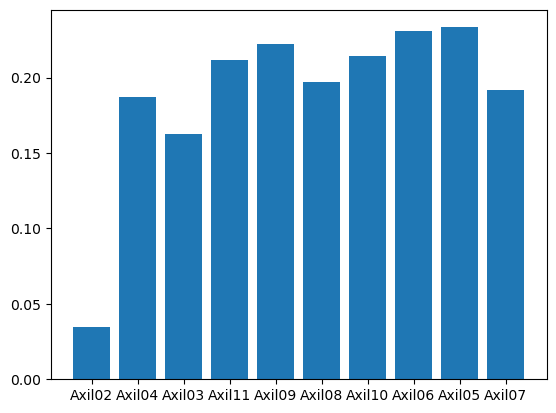

In [33]:
plt.bar(result_mean.index.get_level_values('# Pop ID'), result_mean['Pi'])

In [8]:
for file in glob.glob('Populations-stacks-results/*sumstats_summary.tsv'):
    print(file)

Populations-stacks-results/phylo-infl-miss9-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/phylo-axiI-miss8-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/alt80-axiII-miss95-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/phylo-nico-miss95-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/alt80-axiI-miss9-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/alt80-infl-miss8-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/alt80-axiI-miss95-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/grp41-infl-miss5-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/phylo-infl-miss5-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/alt80-axiI-miss5-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/grp41-axiI-miss8-maf5-th100.recode.p.sumstats_summary.tsv
Populations-stacks-results/grp41-nico-miss95-maf5-th100.recod

In [9]:
stacks_raw = {}
for file in glob.glob('Populations-stacks-results/*sumstats_summary.tsv'):
    with open(file) as rawfile:
        skip = int((len(rawfile.readlines())/2)+1)
        stacks_raw[file.replace('Populations-stacks-results/','').replace('-maf5-th100.recode.p.sumstats_summary.tsv','')] = pd.read_csv(file, sep='\t', skiprows=skip)

stacks_raw

{'phylo-infl-miss9':   # Pop ID  Private  Sites  Variant_Sites  Polymorphic_Sites  \
 0     caes      634   4971           4971               1519   
 1     duse      470   4971           4971               1695   
 2     miss      600   4971           4971               1626   
 3     para      635   4971           4971               1923   
 4     send      391   4970           4970               1643   
 
    %Polymorphic_Loci  Num_Indv      Var   StdErr        P  ...  StdErr.4  \
 0           30.55723   5.72038  0.36485  0.00857  0.92081  ...   0.00247   
 1           34.09777   4.98029  0.80283  0.01271  0.90925  ...   0.00260   
 2           32.70972   5.15852  0.77929  0.01252  0.90981  ...   0.00261   
 3           38.68437   5.78676  0.27766  0.00747  0.90428  ...   0.00257   
 4           33.05835   4.71911  0.30467  0.00783  0.91033  ...   0.00259   
 
    Exp_Hom    Var.5  StdErr.5       Pi    Var.6  StdErr.6      Fis    Var.7  \
 0  0.89339  0.03030   0.00247  0.11687  0.0

In [12]:
for key, df in stacks_raw.items():
    stacks_raw[key]['experiment'] = [key]*len(df)

stacks_raw

{'phylo-infl-miss9':   # Pop ID  Private  Sites  Variant_Sites  Polymorphic_Sites  \
 0     caes      634   4971           4971               1519   
 1     duse      470   4971           4971               1695   
 2     miss      600   4971           4971               1626   
 3     para      635   4971           4971               1923   
 4     send      391   4970           4970               1643   
 
    %Polymorphic_Loci  Num_Indv      Var   StdErr        P  ...  Exp_Hom  \
 0           30.55723   5.72038  0.36485  0.00857  0.92081  ...  0.89339   
 1           34.09777   4.98029  0.80283  0.01271  0.90925  ...  0.87782   
 2           32.70972   5.15852  0.77929  0.01252  0.90981  ...  0.88085   
 3           38.68437   5.78676  0.27766  0.00747  0.90428  ...  0.86858   
 4           33.05835   4.71911  0.30467  0.00783  0.91033  ...  0.88033   
 
      Var.5  StdErr.5       Pi    Var.6  StdErr.6      Fis    Var.7  StdErr.7  \
 0  0.03030   0.00247  0.11687  0.03644   0.00271

In [14]:
stacks_total = pd.concat([df for df in stacks_raw.values()],axis=0)[['experiment','# Pop ID','Private','Obs_Het','Fis','Pi']]
stacks_total[['grp','genom','miss_lvl']] = stacks_total['experiment'].str.split('-',expand=True)
stacks_total = stacks_total.drop(columns='experiment')
stacks_total.columns = ['pop','private','obs_het','fis','pi','grp','genom','miss_lvl']
stacks_total["miss_lvl_int"] = [10 if n == 'miss9' else 5 if n == 'miss95' else 20 if n == 'miss8' else 50 for n in list(stacks_total['miss_lvl'])]
stacks_total

,pop,private,obs_het,fis,pi,grp,genom,miss_lvl,miss_lvl_int
0,caes,634,0.07892,0.09799,0.11687,phylo,infl,miss9,10
1,duse,470,0.07946,0.12358,0.13630,phylo,infl,miss9,10
2,miss,600,0.07494,0.12722,0.13242,phylo,infl,miss9,10
3,para,635,0.08547,0.15494,0.14409,phylo,infl,miss9,10
4,send,391,0.08831,0.09780,0.13409,phylo,infl,miss9,10
...,...,...,...,...,...,...,...,...,...
4,send,340,0.09019,0.09659,0.13494,phylo,secr,miss9,10
0,Preit,444,0.07347,0.25407,0.17449,grp41,nico,miss5,50
1,Psaxi,192,0.07117,0.13415,0.13829,grp41,nico,miss5,50
2,Psche,905,0.06381,0.31982,0.19603,grp41,nico,miss5,50


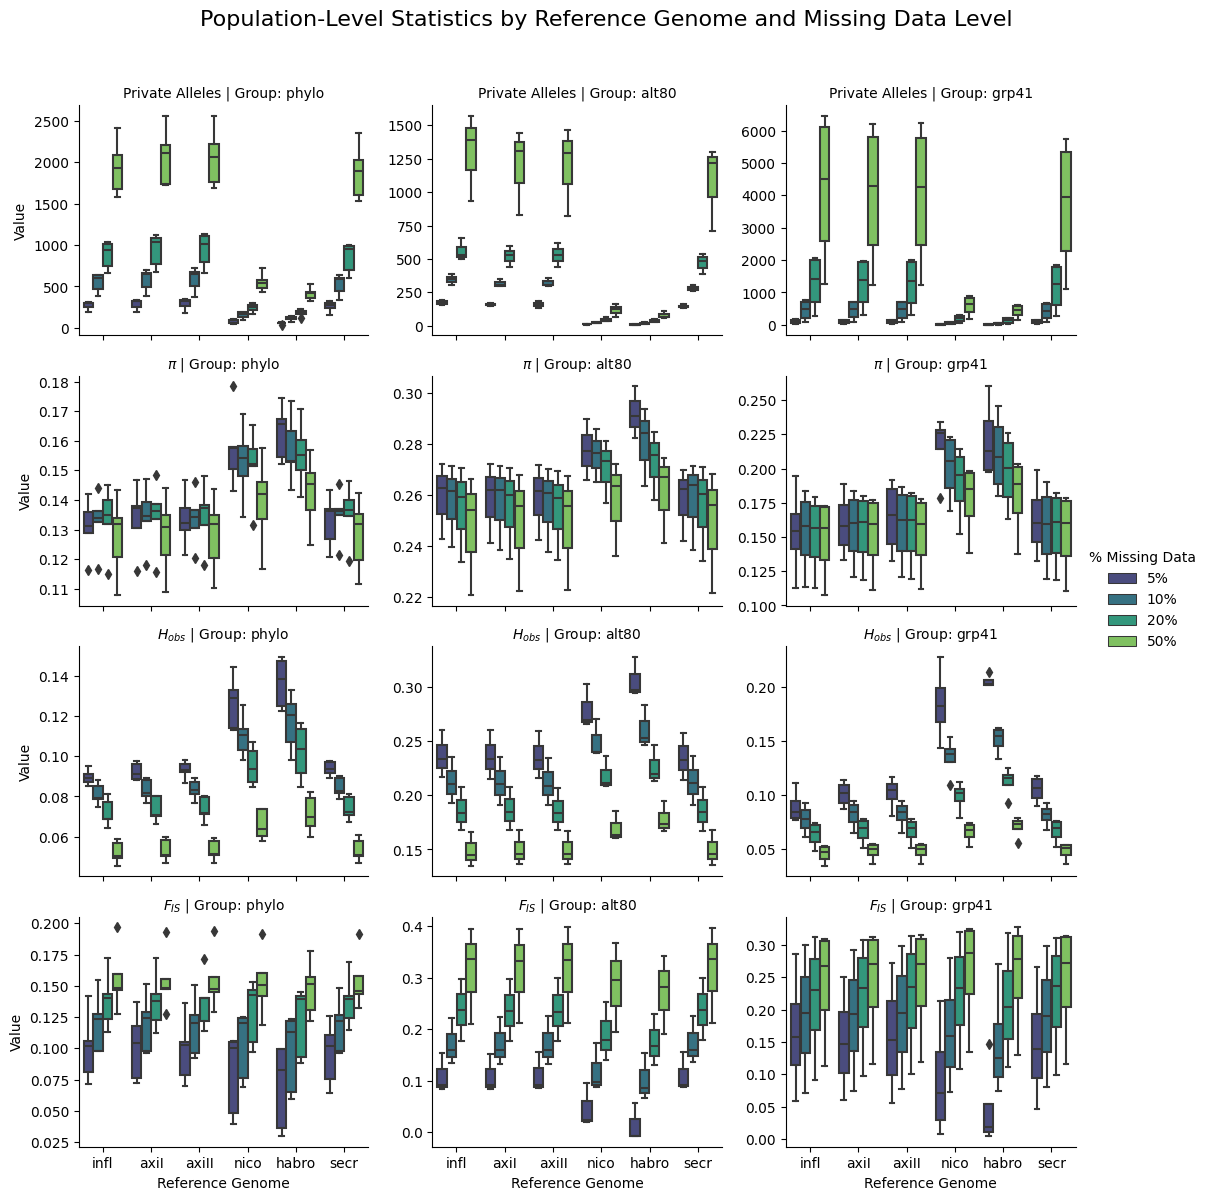

In [15]:
# Melt the DataFrame to long format
df_long = pd.melt(
    stacks_total,
    id_vars=['pop', 'grp', 'genom', 'miss_lvl_int'],
    value_vars=['private', 'pi', 'obs_het', 'fis'],
    var_name='statistic',
    value_name='value'
)

# Convert "miss_lvl_int" values to formatted percentages (e.g., 5 → "5%") with correct order
df_long['% Missing Data'] = pd.Categorical(
    df_long['miss_lvl_int'].astype(str) + '%',
    categories=['5%', '10%', '20%', '50%'],  # Ensure correct order
    ordered=True
)

# Map statistics to LaTeX labels (from previous formatting)
statistic_labels = {
    'pi': r'$\pi$',
    'obs_het': r'$H_{obs}$',
    'private': 'Private Alleles',
    'fis': r'$F_{IS}$'
}
df_long['statistic'] = df_long['statistic'].map(statistic_labels)

# Create the faceted boxplots
g = sns.catplot(
    data=df_long,
    x='genom',
    y='value',
    hue='% Missing Data',  # Use the new formatted column
    col='grp',
    row='statistic',
    kind='box',
    palette='viridis',
    height=3,
    aspect=1.2,
    sharey=False
)

# Adjust titles and labels
g.set_axis_labels("Reference Genome", "Value")
g.set_titles(col_template="Group: {col_name}", row_template="{row_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(
    "Population-Level Statistics by Reference Genome and Missing Data Level",
    fontsize=16
)

plt.savefig("Stacks-Result-AllMissAllGenom.svg", format="svg")
plt.show()

In [6]:
cits = ['Hefei', 'Olympia', 'Linzi', 'Kaifeng', 'Linzi', 'Hefei', 'Jiujiang', 'Yiyang', 'Linzi', 'Kaifeng', 'Linzi', 'Olympia', 'Hefei', 'Olympia', 'Jiujiang', 'Olympia', 'Kaifeng', 'Hefei', 'Jiaodong', 'Shenyang', 'Olympia', 'Kaifeng', 'Jiangzhou', 'Taiyuan', 'Shenyang', 'Zaragoza', 'Juangzhou', 'Taiyuan', 'Juangzhou', 'Taiyuan', 'Kaifeng', 'Astrakhan', 'Guangzhou']

{cit: cits.count(cit) for cit in sorted(cits)}

{'Astrakhan': 1,
 'Guangzhou': 1,
 'Hefei': 4,
 'Jiangzhou': 1,
 'Jiaodong': 1,
 'Jiujiang': 2,
 'Juangzhou': 2,
 'Kaifeng': 5,
 'Linzi': 4,
 'Olympia': 5,
 'Shenyang': 2,
 'Taiyuan': 3,
 'Yiyang': 1,
 'Zaragoza': 1}